# 3.6

## a

[[ 1600.         -3197.99820695  1598.99941687 ...     0.
      0.             0.        ]
 [ 1600.         -3200.          1601.00058313 ...     0.
      0.             0.        ]
 [    0.          1599.49955174 -3200.         ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ... -3200.
   1596.85774809     0.        ]
 [    0.             0.             0.         ...  1603.63550109
  -3200.          1597.352965  ]
 [    0.             0.             0.         ...  1596.36449891
  -3187.43099234  1592.05889499]]


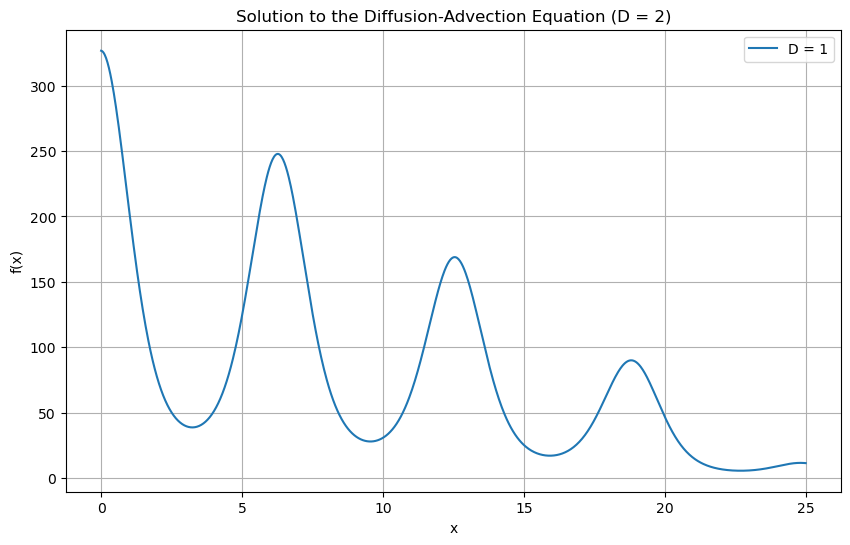

[[ 0.          2.00179305 -1.00058313 ...  0.          0.
   0.        ]
 [ 0.         -0.          1.00058313 ...  0.          0.
   0.        ]
 [ 0.         -0.50044826 -0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -0.         -3.14225191
   0.        ]
 [ 0.          0.          0.         ...  3.63550109 -0.
  -2.647035  ]
 [ 0.          0.          0.         ... -3.63550109 12.56900766
  -7.94110501]]


LinAlgError: Singular matrix

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# Constants

def diffusion_advection(D):
    N = 1000
    L = 25
    dx = L / N 
    x = np.linspace(0, L, N)  

    # Velocity field
    v = -np.sin(x)   


    # diag(v(x))
    V = np.diag(v)
    A1 = np.zeros((N, N))

    A1[0,0], A1[0,1], A1[0,2] = -3/2, 2, -1/2 # foward difference
    for i in range(1,N-1):
        A1[i,i-1], A1[i,i], A1[i,i+1] = -1/2, 0, 1/2 # central difference
    A1[N-1,N-3], A1[N-1,N-2], A1[N-1,N-1] = 1/2, -2, 3/2 # backward difference

    A1 = (1 / dx) * A1


    A2 = np.zeros((N, N))
    A2[0,0], A2[0,1], A2[0,2] = 1, -2, 1 # foward difference
    for i in range(1,N-1):
        A2[i,i-1], A2[i,i], A2[i,i+1] = 1, -2, 1 # central difference
    A2[N-1,N-3], A2[N-1,N-2], A2[N-1,N-1] = 1, -2, 1 # backward difference

    A2 = (D / dx**2) * A2
    
    # T1 = A1 * V
    T1 = A1 @ V
    
    b = np.zeros(N) # second boundary condition (f(25) = 0)
    b[0] = 1 # first boundary condition (f(0) = 1), 
    A = A2 - T1
    A[0,:] = 0
    A[0,0] = 1
    A[N-1,:] = 0
    A[N-1,N-1] = 1

    f = np.linalg.solve(A,b)
    return x, f

D = 1
x, f = diffusion_advection(D)
# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x, f, label=f'D = {D}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Solution to the Diffusion-Advection Equation (D = 2)')
plt.legend()
plt.grid(True)
plt.show()

D = 0
x, f = diffusion_advection(D)

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x, f, label=f'D = {D}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Solution to the Diffusion-Advection Equation (D = 2)')
plt.legend()
plt.grid(True)
plt.show()


## b

## c

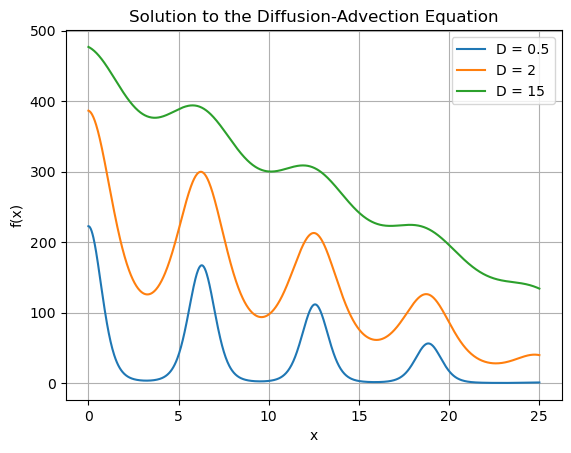

In [19]:
D_values = [0.5, 2, 15]

for D in D_values:
    x, f = diffusion_advection(D)
    plt.plot(x, f, label=f'D = {D}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Solution to the Diffusion-Advection Equation')
    plt.legend()
    plt.grid(True)
plt.show()

# 4.1

## a 

## b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Constants
D = 2  # Diffusion coefficient
L = 25  # Length of the domain
N = 1000  # Number of grid points
dx = L / N  # Grid spacing (note the change here)
x = np.linspace(0, L, N+1)  # Grid points, now has N+1 points

# Velocity field
v = -np.sin(x)

# Finite difference coefficients
lower_diag = np.ones(N-1) * (-D / dx**2 - v[1:N] / (2*dx))
main_diag = np.ones(N) * (2*D / dx**2)
upper_diag = np.ones(N-1) * (-D / dx**2 + v[1:N] / (2*dx))

# Construct the banded matrix
A_banded = np.zeros((3, N))
A_banded[0, 1:] = upper_diag  # Upper diagonal
A_banded[1, :] = main_diag  # Main diagonal
A_banded[2, :-1] = lower_diag  # Lower diagonal

# Boundary conditions vector
b = np.zeros(N)
b[0] = D / dx**2  # Incorporate boundary condition f(0) = 1

# Solve the system
f_interior = solve_banded((1, 1), A_banded, b)
f = np.concatenate(([1], f_interior))  # Add the boundary conditions

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x, f, label=f'D = {D}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Solution to the Diffusion-Advection Equation (D = 2)')
plt.legend()
plt.grid(True)
plt.show()

# 4.3

## a

## b

## c

## d